# Bulk download nc files (Aphrodite) Part I

# Instructions
For the sake of executing this script, username and password of the instructor has been used. You will need to create an account on https://www.chikyu.ac.jp/precip/english/ for getting authorization to access files.

In [ ]:
# Import libraries
import requests 
import numpy as np #NumPy support large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import os

In [ ]:
# Enter username and password
username = 'engrjunaid07@gmail.com'
password = 'XNeY9qvk'

#Username and password
#ID: engrjunaid07@gmail.com
#PW: XNeY9qvk

In [ ]:
# chech current working directory 
os.getcwd()

In [ ]:
#Script will execute and download files for all years except the last year in bracket
years = np.arange(2008,2010)
for year in years:
    url = 'http://aphrodite.st.hirosaki-u.ac.jp/product/APHRO_V1808_TEMP/APHRO_MA/025deg_nc/APHRO_MA_TAVE_025deg_V1808.'+ str(year)+ '.nc.gz'
    r = requests.get(url, auth=(username,password), allow_redirects = True)
    open(str(year)+'.gz', 'wb').write(r.content)

# Unzip netCDF files Part II

# Instructions:
1. You may need to install gzip library to execute this part of the script.

In [ ]:
import gzip
import os

# Path to the directory containing .gz files
directory = os.getcwd() #os.path.expanduser("~") as this function retrieves home directory

# Extension for the uncompressed files
uncompressed_extension = ".nc"  # Modify this to your desired extension

# Loop over all files in the directory
for filename in os.listdir():
    if filename.endswith(".gz"):
        file_path = os.path.join(directory, filename)
        output_path = os.path.splitext(file_path)[0] + uncompressed_extension

        # Open .gz file and create output file
        with gzip.open(file_path, 'rb') as f_in, open(output_path, 'wb') as f_out:
            f_out.write(f_in.read())

        print(f"File {filename} unzipped successfully.")


# Reading netCDF files Part III

# Instructions
You might need to install netCDF4 using 'pip install netCDF4' 

In [ ]:
# Import libraries
from netCDF4 import Dataset
import numpy as np
import pandas as pd 
import os

In [ ]:
# loading netCDF file using Dataset function of netCDF library 
data = Dataset('2008.nc')

In [ ]:
# Reading in the netCDF file
print(data.variables.keys())

In [ ]:
# Reading data
data

In [ ]:
# Reading data variable lat
data.variables['lat']

In [ ]:
# Reading data variable lon
data.variables['lon']

In [ ]:
# Reading data variable time
data.variables['time']

In [ ]:
# Reading data variable tave
data.variables['tave']

In [ ]:
# Storing the lat and lon data into the variables 
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]

In [ ]:
lat

In [ ]:
lon

# Finding time series of Temperature at a point of interest Part IV

In [ ]:
# Storing the lat and lon of a place in Asia into variables 
lat_A =  33.70
lon_A =  73.10

In [ ]:
# Calculating squared difference of lat and lon 
diff_lat = (lat - lat_A)**2
diff_lon = (lon - lon_A)**2

In [ ]:
diff_lat

In [ ]:
# Identifying the index of the value for lat and lon 
min_index_lat = diff_lat.argmin()
min_index_lon = diff_lon.argmin()

In [ ]:
min_index_lat

In [ ]:
min_index_lon

In [ ]:
temp = data.variables['tave']
temp

In [ ]:
# Creating an empty pandas dataframe
starting_date = data.variables['time'].units[14:24]
ending_date = data.variables['time'].units[14:18] + '-12-31'
date_range = pd.date_range(start = starting_date, end = ending_date)
df = pd.DataFrame(0, columns = ['Temparature'], index = date_range)

dt = np.arange(0, data.variables['time'].size)

In [ ]:
data.variables['time']

In [ ]:
# indexing the starting data from data variable 'time'
starting_date = data.variables['time'].units[14:24]
starting_date

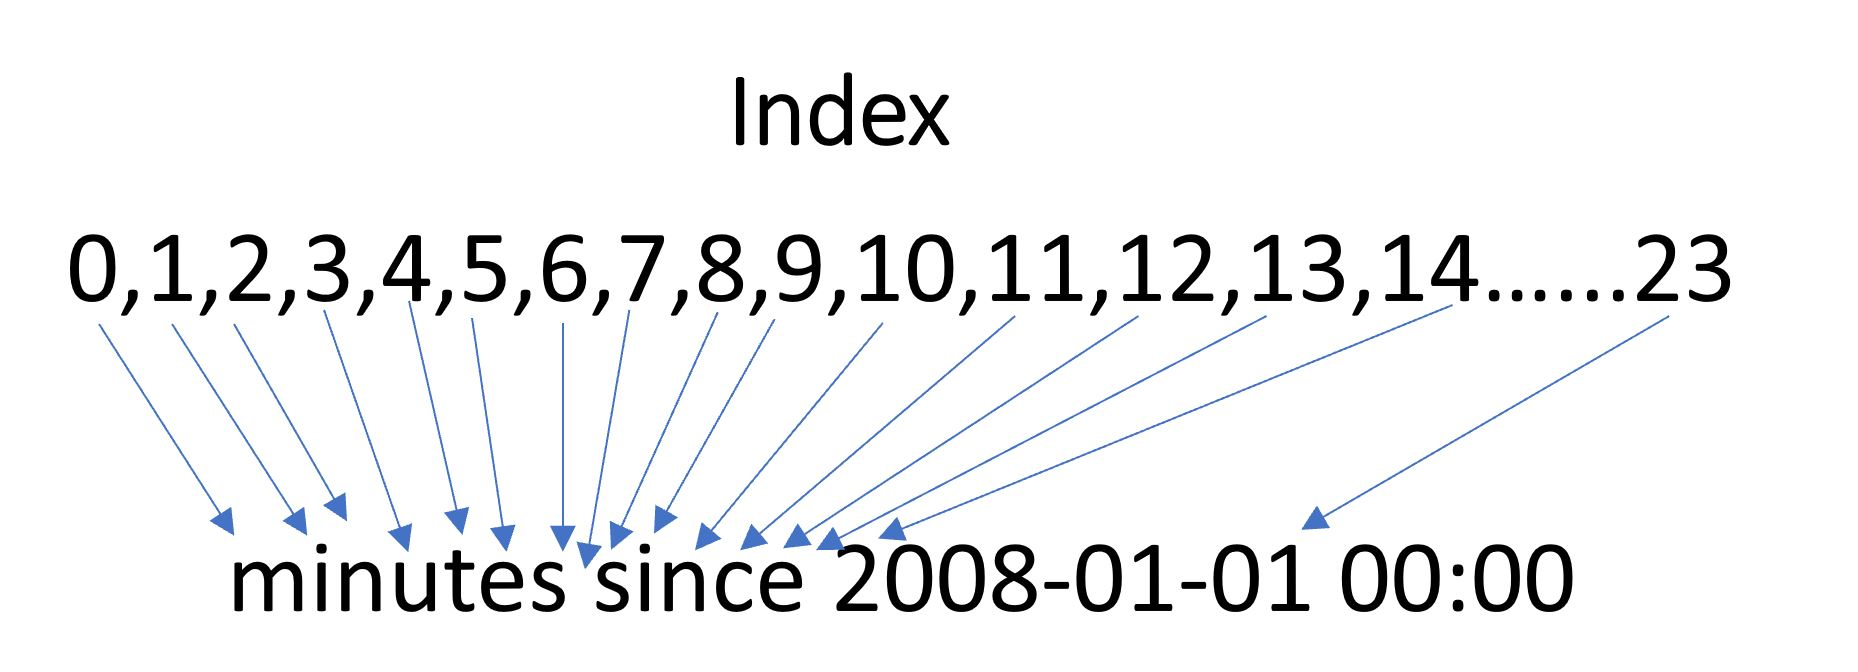

In [ ]:
# indexing the ending data from data variable 'time'
ending_date = data.variables['time'].units[14:18] + '-12-31'
ending_date

In [ ]:
date_range = pd.date_range(start = starting_date, end = ending_date)
date_range

In [ ]:
df = pd.DataFrame(0, columns = ['Temparature'], index = date_range)
df

In [ ]:
dt = np.arange(0, data.variables['time'].size)
dt

In [ ]:
time_index = 0
df.iloc[time_index] = temp[time_index,min_index_lat ,min_index_lon]
df.iloc[time_index]

In [ ]:
time_index = 1
df.iloc[time_index] = temp[time_index,min_index_lat ,min_index_lon]
df.iloc[time_index]

In [ ]:
time_index = 2
df.iloc[time_index] = temp[time_index,min_index_lat ,min_index_lon]
df.iloc[time_index]

In [ ]:
for time_index in dt:          #for time_index in range(365): we could use range function but leap years have 366 days
    df.iloc[time_index] = temp[time_index,min_index_lat ,min_index_lon]

In [ ]:
df

In [ ]:
# Saving the time series into a csv , temperature values are in °C
df.to_csv('temparature_2008Isb.csv')